In [1]:
from imageai.Detection import ObjectDetection
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img
import os
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
def get_detector(model='yolo'):
    execution_path = os.getcwd()
    detector = ObjectDetection()
    detector.setModelTypeAsYOLOv3()
    detector.setModelPath(os.path.join(execution_path , './modules/' + model + '.h5'))
    detector.loadModel()
    custom_objects = detector.CustomObjects(car=True)
    return detector, custom_objects, execution_path
    
def filter_files(files_list, filter_by = None):
    try:
        files_list.remove('.DS_Store')
    except:
        x=1
        
    if filter_by is not None:
        mask = np.logical_not(np.isin(files_list, filter_by))
        result = []
        for f, m in zip(files_list, mask):
            if m == True:
                result.append(f)

        return result
    else:
        return files_list

def get_box(detections, size):
    img_area = size[0] * size[1]
    
    area = 0
    points = None
    for detection in detections:
        current_area = (detection['box_points'][2] - detection['box_points'][0]) * (detection['box_points'][3] - detection['box_points'][1])
        if current_area > area:
            area = current_area
            points = detection['box_points']
            
    if area / img_area < 0.2:
        return None
    else:
        return points

def crop_dir(detector, custom_objects, execution_path, source_path, target_path, directory):
    if os.path.exists(target_path + directory) == False:
        os.mkdir(target_path + directory)
    
    filenames = os.listdir(source_path + directory)
    filenames = filter_files(filenames)
    
    for filename in filenames:
        detections = detector.detectCustomObjectsFromImage(
            custom_objects=custom_objects,
            input_image=os.path.join(execution_path , source_path + directory + '/' + filename), 
            minimum_percentage_probability=10,
            extract_detected_objects=False
        )
        img = load_img(source_path + directory + '/' + filename)
        box = get_box(detections, img.size)
        cropped_img = img.crop(box)
        save_img(target_path + directory + '/' + filename, cropped_img)
    
def crop(source_path, target_path, dirs_path, model='yolo'):
    dirs = os.listdir(dirs_path)
    target_dirs = os.listdir(target_path)
    dirs = filter_files(dirs, target_dirs)

    if os.path.exists(target_path) == False:
        os.mkdir(target_path)
        
    detector, custom_objects, execution_path = get_detector(model)
    
    for i, directory in enumerate(dirs):
        print('Directory', str(i), 'of', str(len(dirs)), '...')
        crop_dir(detector, custom_objects, execution_path, source_path, target_path, directory)
        print('Images in directory', str(i), '"' + directory + '"', 'cropped')

In [3]:
crop(
    './stanford-car-dataset-by-classes-folder/car_data/', 
    './stanford-car-dataset-by-classes-folder/cropped_car_data/',
    './stanford-car-dataset-by-classes-folder/train_dataset/',
    'yolo',
)

Directory 0 of 62 ...
Images in directory 0 "Chevrolet HHR_SS Hatchback 2010" cropped
Directory 1 of 62 ...
Images in directory 1 "Chevrolet Corvette Coupe 2012 ZR1" cropped
Directory 2 of 62 ...
Images in directory 2 "Audi 100 Wagon 1994" cropped
Directory 3 of 62 ...
Images in directory 3 "Chevrolet Avalanche Crew_Cab 2012" cropped
Directory 4 of 62 ...
Images in directory 4 "Acura ZDX SUV 2012" cropped
Directory 5 of 62 ...
Images in directory 5 "Audi TT Coupe 2011" cropped
Directory 6 of 62 ...
Images in directory 6 "Acura TSX Sedan 2012" cropped
Directory 7 of 62 ...
Images in directory 7 "BMW X5 SUV 2007" cropped
Directory 8 of 62 ...
Images in directory 8 "Chevrolet Express_1 Van 2007" cropped
Directory 9 of 62 ...
Images in directory 9 "Bentley Continental_2 Coupe 2012" cropped
Directory 10 of 62 ...
Images in directory 10 "BMW X3 SUV 2012" cropped
Directory 11 of 62 ...
Images in directory 11 "BMW 1_Series Coupe 2012" cropped
Directory 12 of 62 ...
Images in directory 12 "Audi

## Preview

[{'name': 'car', 'percentage_probability': 63.315439224243164, 'box_points': (637, 195, 700, 318)}]
(700, 525)
None


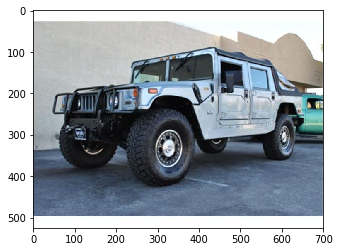

In [3]:
execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(os.path.join(execution_path , "./modules/yolo.h5"))
detector.loadModel()
custom_objects = detector.CustomObjects(car=True)

detections = detector.detectCustomObjectsFromImage(
    custom_objects=custom_objects,
    input_image=os.path.join(execution_path , "./stanford-car-dataset-by-classes-folder/car_data/AM Hummer SUV 2000/00163.jpg"), 
    minimum_percentage_probability=30,
    output_image_path=os.path.join(execution_path , "image2new.jpg"),
    #extract_detected_objects=True
)

print(detections)
img = load_img('./stanford-car-dataset-by-classes-folder/car_data/AM Hummer SUV 2000/00163.jpg')
print(img.size)
w,h = img.size

box = get_box(detections, img.size)
print(box)
crop_img = img.crop(box)
plt.imshow(crop_img)